Saturation curves for SM-omics and ST<br>

Input files are generated by counting number of unique molecules and number of annotated reads per annotated region after adjusting for sequencing depth, in downsampled fastq files (proportions 0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1) processed using ST-pipeline.<br>

data files needed to run are available at SCP: https://singlecell.broadinstitute.org/single_cell/study/SCP979/<br>
please download:<br>
10005CN48_C1_uniq_molecules_per_region_adjusted_after_seq_depth_on_satRationXtot_count.txt<br>
10005CN48_D1_uniq_molecules_per_region_adjusted_after_seq_depth_on_satRationXtot_count.txt<br>
10005CN48_E1_uniq_molecules_per_region_adjusted_after_seq_depth_on_satRationXtot_count.txt<br>
10015CN60_E2_uniq_molecules_per_region_adjusted_after_seq_depth_on_satRationXtot_count.txt<br>
10015CN84_C2_uniq_molecules_per_region_adjusted_after_seq_depth_on_satRationXtot_count.txt<br>
10015CN84_D2_uniq_molecules_per_region_adjusted_after_seq_depth_on_satRationXtot_count.txt<br>

In [2]:
%matplotlib inline
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
import warnings
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

In [3]:
def condition(row):
    """ Takes row in pandas df as input and returns type of condition
    """
    # The samples are run in triplicate based on condition
    condition = ['sm-omics', 'ST']

    if row['Name'] in ['10015CN84_D2', '10015CN84_C2', '10015CN60_E2']:
        return condition[0]
    
    elif row['Name'] in ['10005CN48_C1','10005CN48_D1','10005CN48_E1']:
        return condition[1]
    

In [4]:
# Load input files
path = '../../smomics_data'

stats_list = []

samples_list = ['10005CN48_C1', '10005CN48_D1', '10005CN48_E1', '10015CN84_D2', '10015CN84_C2', '10015CN60_E2']
    
spots_under_tissue = {'10005CN48_C1':258,
              '10005CN48_D1':252,
               '10005CN48_E1':203,
              '10015CN84_D2': 201,
              '10015CN84_C2': 241,
            '10015CN60_E2':235}
    
for filename in samples_list:
    
    cond_file = pd.read_csv(os.path.join(path, filename + '_uniq_molecules_per_region_adjusted_after_seq_depth_on_satRationXtot_count.txt'), sep = '\t')
    if numpy.unique(cond_file['Name']) == '10005CN60_E2':
        cond_file['Name'] = '10015CN60_E2'
    cond_file['Condition'] = cond_file.apply(lambda row: condition(row), axis = 1)
    cond_file['norm uniq mol'] = cond_file['Unique_molecules'] / spots_under_tissue[cond_file['Name'][0]]

    stats_list.append(cond_file)

# Concat all files
cond_merge = pd.concat(stats_list)
    

In [5]:
prop_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]

cond_list = []
for label, df in cond_merge.groupby(['Condition', 'Name', 'Annotated_region']):
    
    # Sort df by annotated reads
   
    df.sort_values(by='Annotated_reads', inplace=True)
    
    df['Prop_annot_reads'] = prop_list
        
    cond_list.append(df)
    
# Concatenate all dfs in list
plot_df_tmp = pd.concat(cond_list)

# Remove 'unknown' regions, if any
plot_df_big = plot_df_tmp[plot_df_tmp['Annotated_region'] != 'Unknown']
plot_df_big_max = plot_df_big[plot_df_big['Prop_annot_reads'] == 1.000]

In [6]:
# Prepare samples for plotting
ll = []

for label, df in plot_df_big.groupby(['Name']):
    # Get max annotated reads
    max_annot = df['Annotated_reads'].max()
    
    # Get tot number of uniq mol at that amount of annotated reads
    tot_uniq_mol = df[df['Annotated_reads'] == max_annot]['Unique_molecules'].sum()
       
    df['Prop_uniq_mol'] = df['Unique_molecules'] / tot_uniq_mol
    ll.append(df)

# Concatenate all dfs in list
prop_df = pd.concat(ll)
plot_dict = {}

# Get a df per annotated region
for label, df in prop_df.groupby(['Annotated_region']):
        
    #df.drop(['Num reads', 'Annotated_reads', 'Unique_molecules'], axis=1, inplace=True)

    plot_dict[label] = df

plot_dict_all = {}
    
for label in ['sm-omics', 'ST']:
    df = plot_df_big[plot_df_big['Condition'] == label]
    df = df.groupby(['Condition', 'Name', 'Prop_annot_reads']).sum()    
    df['Prop_annot_reads'] = list(df.index.get_level_values(2))
    df['Condition'] = list(df.index.get_level_values(0))
    plot_dict_all[label] = df

GL
GR
IPL
MI
ONL
OPL


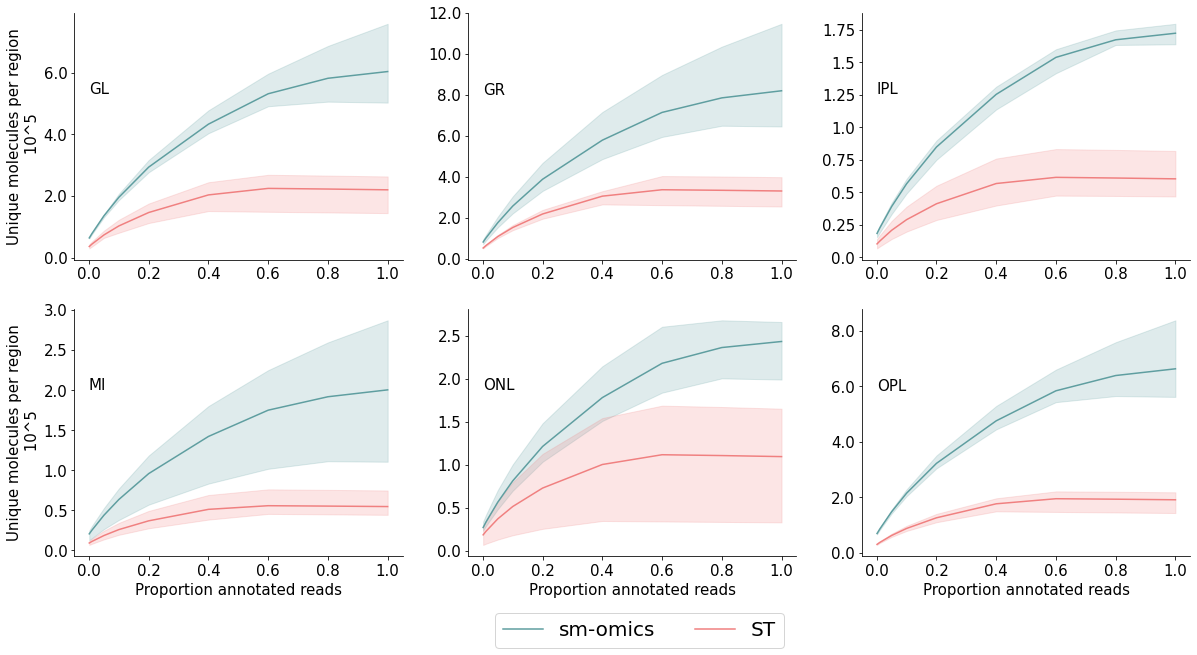

In [9]:
#Plot 
fig = plt.figure(figsize=(20, 10))
# for a 2x3 subplot
axes = []
for row_idx in range(0,2):
    for col_idx in range(0,3):
        ax = plt.subplot2grid((2, 3), (row_idx, col_idx))
        axes.append(ax) 

x="Prop_annot_reads"
y="Unique_molecules"
hue='Condition'
hue_order=['sm-omics', 'ST']
palette = ['cadetblue', 'lightcoral']
err_style="band"
ci=95

################ LINE PLOT
count = 0
for key, value in plot_dict.items():
    
    ax=axes[count]
    print(key)
    #print(value)
    
    if count == 4:
        sns.lineplot(x=x, y=y, data=value, ci=ci, err_style=err_style, hue=hue, 
                 palette = palette, ax=ax, hue_order=hue_order)
    else:
        sns.lineplot(x=x, y=y, data=value, ci=ci, err_style=err_style, hue=hue, 
                 palette = palette, ax=ax, hue_order=hue_order, 
                legend=False)
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    
    # X and y label size
    if count in [3, 4, 5]:
        ax.set_xlabel("Proportion annotated reads", fontsize=15)
    else:
        ax.set_xlabel("")
        
    if count in [0, 3]:
        ax.set_ylabel("Unique molecules per region\n 10^5", fontsize=15)
    else:
        ax.set_ylabel("")
    
    # Set ticks size
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(float(x/100000), ',')))
    
    # change background color
    back_c = 'white'
    ax.set_facecolor(back_c)
    ax.grid(False)
    
    # text
    ax.text(0, max(value[y])-0.3*max(value[y]), key, fontsize=15)
    
    count += 1

# LEGEND
handles, labels = axes[4].get_legend_handles_labels()
axes[4].legend(handles=handles[0:], labels=hue_order,loc='center left', bbox_to_anchor=(0.05, -0.3), ncol=2, fontsize=20)

fig.set_size_inches(20, 10)
# plt.savefig("../../figures/umi_saturation_per_region_sm_st.pdf", transparent=True, bbox_inches = 'tight',
#    pad_inches = 0, dpi=1200)

plt.show()

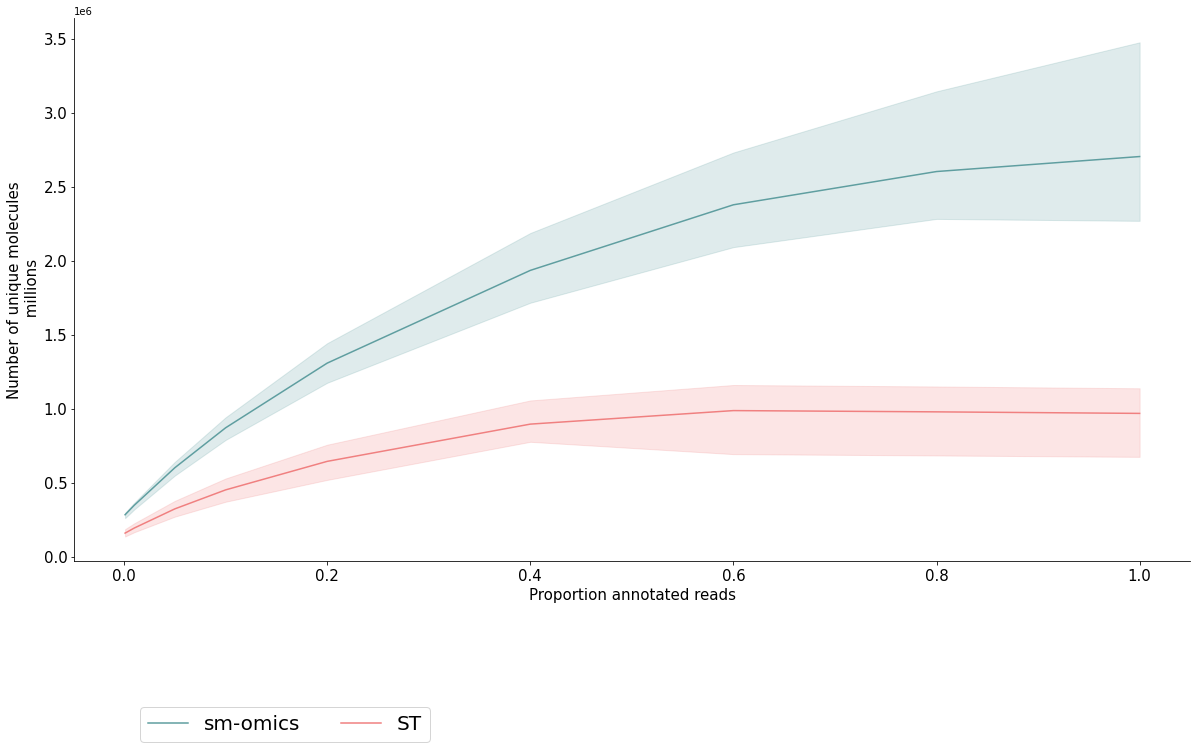

In [57]:
#Plot 
fig = plt.figure(figsize=(5, 5)) 

x="Prop_annot_reads"
y="Unique_molecules"
hue='Condition'
hue_order=['sm-omics', 'ST']
palette = ['cadetblue', 'lightcoral']
err_style="band"
ci=95

################ LINE PLOT
count = 0
for key, value in plot_dict_all.items():
    
    #print(key)
    #print(value)
    
    ax = sns.lineplot(x=x, y=y, data=value, ci=ci, err_style=err_style, hue=hue, 
                 palette = palette, hue_order=hue_order, )
     
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    
    # X and y label size
    ax.set_xlabel("Proportion annotated reads", fontsize=15)
    ax.set_ylabel("Number of unique molecules\n millions", fontsize=15)
    
    # Set ticks size
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    
    # change background color
    back_c = 'white'
    ax.set_facecolor(back_c)
    ax.grid(False)
    

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=hue_order,loc='center left', bbox_to_anchor=(0.05, -0.3), ncol=2, fontsize=20)
        
fig.set_size_inches(20, 10)
# plt.savefig("../../figures/umi_saturation_total_sm_st.pdf", transparent=True, bbox_inches = 'tight',
#    pad_inches = 0, dpi=1200)
plt.show()

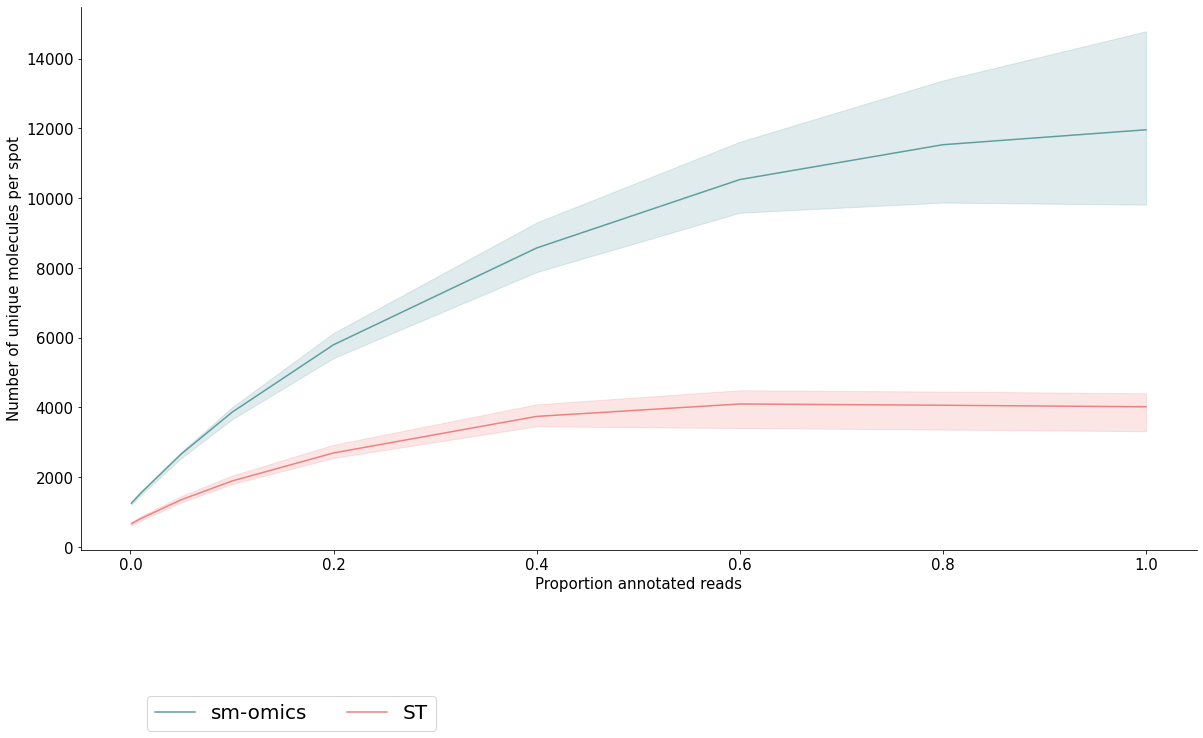

In [58]:
#Plot 
fig = plt.figure(figsize=(5, 5)) 

x="Prop_annot_reads"
y="norm uniq mol"
hue='Condition'
hue_order=['sm-omics', 'ST']
palette = ['cadetblue', 'lightcoral']
err_style="band"
ci=95

################ LINE PLOT
count = 0
for key, value in plot_dict_all.items():
    
    #print(key)
    #print(value)
    
    ax = sns.lineplot(x=x, y=y, data=value, ci=ci, err_style=err_style, hue=hue, 
                 palette = palette, hue_order=hue_order, )
     
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    
    # X and y label size
    ax.set_xlabel("Proportion annotated reads", fontsize=15)
    ax.set_ylabel("Number of unique molecules per spot", fontsize=15)
    
    # Set ticks size
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    
    # change background color
    back_c = 'white'
    ax.set_facecolor(back_c)
    ax.grid(False)
    

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=hue_order,loc='center left', bbox_to_anchor=(0.05, -0.3), ncol=2, fontsize=20)
        
fig.set_size_inches(20, 10)
# plt.savefig("../../figures/umi_saturation_total_sm_st_per_spot.pdf", transparent=True, bbox_inches = 'tight',
#    pad_inches = 0, dpi=1200)
plt.show()

In [24]:
plot_df_big_max[(plot_df_big_max['Condition'] == 'ST')].groupby(['Annotated_region']).mean().drop(['Num reads', 'Annotated_reads', 'Prop_annot_reads'], axis = 1)

,Unique_molecules,Number of genes,norm uniq mol
Annotated_region,,,
GL,220137.666667,8590.666667,911.618284
GR,331461.000000,8593.333333,1386.547097
IPL,60268.666667,7606.666667,253.368582
MI,54628.000000,7481.333333,228.622418
ONL,109246.000000,7906.666667,438.891153
OPL,191639.666667,8559.666667,799.888794


In [25]:
plot_df_big_max[(plot_df_big_max['Condition'] == 'ST')].groupby(['Annotated_region']).std().drop(['Num reads', 'Annotated_reads', 'Prop_annot_reads'], axis = 1)

,Unique_molecules,Number of genes,norm uniq mol
Annotated_region,,,
GL,65673.467689,853.258656,172.986036
GR,71838.418280,847.316548,171.984809
IPL,18797.937236,728.107364,65.832575
MI,17390.543379,775.935779,56.451488
ONL,68533.197766,1463.500028,248.267397
OPL,41448.460060,846.807141,81.795616


In [26]:
100*plot_df_big_max[(plot_df_big_max['Condition'] == 'ST')].groupby(['Annotated_region']).std().drop(['Num reads', 'Annotated_reads', 'Prop_annot_reads'], axis = 1)/plot_df_big_max[(plot_df_big_max['Condition'] == 'ST')].groupby(['Annotated_region']).mean().drop(['Num reads', 'Annotated_reads', 'Prop_annot_reads'], axis = 1)

,Unique_molecules,Number of genes,norm uniq mol
Annotated_region,,,
GL,29.832908,9.932392,18.975709
GR,21.673264,9.860162,12.403820
IPL,31.190232,9.571964,25.982927
MI,31.834487,10.371624,24.692018
ONL,62.732913,18.509697,56.566963
OPL,21.628330,9.892992,10.225873


In [27]:
plot_df_big_max[(plot_df_big_max['Condition'] == 'sm-omics')].groupby(['Name']).sum().drop(['Num reads', 'Annotated_reads', 'Prop_annot_reads'], axis = 1)

,Unique_molecules,Number of genes,norm uniq mol
Name,,,
10015CN60_E2,3474520.0,63218,14785.191489
10015CN84_C2,2365597.0,53374,9815.755187
10015CN84_D2,2268410.0,54537,11285.621891


In [28]:
plot_df_big_max[(plot_df_big_max['Condition'] == 'ST')].groupby(['Name']).sum().drop(['Num reads', 'Annotated_reads', 'Prop_annot_reads'], axis = 1)

,Unique_molecules,Number of genes,norm uniq mol
Name,,,
10005CN48_C1,1137129.0,52112,4407.476744
10005CN48_D1,1091312.0,51520,4330.603175
10005CN48_E1,673702.0,42583,3318.729064


In [29]:
plot_df_big_max[(plot_df_big_max['Condition'] == 'sm-omics')].groupby(['Name']).sum().drop(['Num reads', 'Annotated_reads', 'Prop_annot_reads'], axis = 1)

,Unique_molecules,Number of genes,norm uniq mol
Name,,,
10015CN60_E2,3474520.0,63218,14785.191489
10015CN84_C2,2365597.0,53374,9815.755187
10015CN84_D2,2268410.0,54537,11285.621891


In [52]:
plot_df_tmp['Prop_annot_reads'] = 100*plot_df_tmp['Prop_annot_reads']

In [53]:
plot_df_tmp

,Name,Annotated_region,Unique_molecules,Number of genes,Num reads,Annotated_reads,Condition,norm uniq mol,Prop_annot_reads
0,10005CN48_C1,GL,43412.0,8484,1148609,403310,ST,168.263566,0.1
12,10005CN48_C1,GL,52574.0,9081,1438051,505165,ST,203.775194,1.0
30,10005CN48_C1,GL,87580.0,10375,2724456,956640,ST,339.457364,5.0
42,10005CN48_C1,GL,122862.0,10927,4332462,1522764,ST,476.209302,10.0
48,10005CN48_C1,GL,175650.0,11293,7548475,2652120,ST,680.813953,20.0
...,...,...,...,...,...,...,...,...,...
53,10015CN84_D2,OPL,304747.0,10901,7548475,3318684,sm-omics,1516.154229,20.0
11,10015CN84_D2,OPL,445359.0,10808,13980500,6147251,sm-omics,2215.716418,40.0
23,10015CN84_D2,OPL,543426.0,10391,20412525,8976083,sm-omics,2703.611940,60.0
29,10015CN84_D2,OPL,593278.0,10001,26844551,10824225,sm-omics,2951.631841,80.0


In [54]:
plot_df_tmp.to_csv('../../smomics_data/sm_st_unique_molecules_per_region.csv')

In [55]:
ls = []
for label in ['sm-omics', 'ST']:
    df = plot_df_big[plot_df_big['Condition'] == label]
    df = df.groupby(['Condition', 'Name', 'Prop_annot_reads']).sum()    
    df['Prop_annot_reads'] = list(df.index.get_level_values(2))
    df['Condition'] = list(df.index.get_level_values(0))
    df['Prop_annot_reads'] = 100*df['Prop_annot_reads']
    ls.append(df)
pd.concat(ls).to_csv('../../smomics_data/sm_st_unique_molecules.csv')

In [46]:
pd.concat(ls)

Unique_molecules  Number of genes  \
Condition Name         Prop_annot_reads                                      
sm-omics  10015CN60_E2 0.001                     295901.0            44630   
                       0.010                     363657.0            47966   
                       0.050                     639802.0            56166   
                       0.100                     940869.0            60167   
                       0.200                    1441698.0            63888   
                       0.400                    2186185.0            65771   
                       0.600                    2730110.0            65512   
                       0.800                    3143332.0            64162   
                       1.000                    3474520.0            63218   
          10015CN84_C2 0.001                     292300.0            43664   
                       0.010                     357534.0            47287   
                       0.050                     613574.0            54795   
                       0.100                     881216.0            58173   
                       0.200                    1305156.0            61168   
                       0.400                    1899586.0            62101   
                       0.600                    2309670.0            60297   
                       0.800                    2379714.0            56898   
                       1.000                    2365597.0            53374   
          10015CN84_D2 0.001                     259527.0            40670   
                       0.010                     318030.0            43845   
                       0.050                     547479.0            51644   
                       0.100                     788131.0            55589   
                       0.200                    1174110.0            59134   
                       0.400                    1714990.0            60667   
                       0.600                    2090687.0            59626   
                       0.800                    2281487.0            58093   
                       1.000                    2268410.0            54537   
ST        10005CN48_C1 0.001                     184993.0            42147   
                       0.010                     224615.0            45568   
                       0.050                     376412.0            53978   
                       0.100                     527550.0            57853   
                       0.200                     755793.0            61615   
                       0.400                    1054856.0            62686   
                       0.600                    1159248.0            59760   
                       0.800                    1149253.0            55959   
                       1.000                    1137129.0            52112   
          10005CN48_D1 0.001                     154831.0            36561   
                       0.010                     188844.0            39730   
                       0.050                     320737.0            48047   
                       0.100                     453756.0            52486   
                       0.200                     655942.0            56461   
                       0.400                     927788.0            58637   
                       0.600                    1107481.0            57957   
                       0.800                    1100936.0            54713   
                       1.000                    1091312.0            51520   
          10005CN48_E1 0.001                     135535.0            33899   
                       0.010                     164400.0            36955   
                       0.050                     269687.0            44859   
                       0.100                     370446.0            48890   
                       0.200                     518008.0      